## INTRODUCTION

##### Deep learning : 
    A machine learning technique learning features directly from data.
    
- This means we don't need any feature extraction as opposed to machine learning.

Deep learning has been started using, since the machine learning algorithms couldn't handle big amounts of data like having millions of samples in terms of performance.

#### Usage of fileds : 
    Speech recognition, image classification, natural language processing, recommendation systems etc.

#### Differences between machine learning & deep learning

In machine learning, we have to give the features of an output manually. As regard to deep learning, it learns and classify the features itself from data when we get data into a neural network. Consider some images of dogs. In machine learning we've got to give feature samples manually and imply feature extraction. Then we imply a proper classification technique to the data for its telling us if it's a dog or not. But in deep learning, we just give a data full of dog images to our model and this model makes above machine learning requirements in itself.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import warnings 
warnings.filterwarnings('ignore')

### OVERVIEW THE DATA SET

1. Our data can be called as "numbers in sign language" having images of numbers in sign language from 0 to 9.
2. Since we'll do a "logistic regression classification", we'll use only 2 outputs which are sign 0 and sign 1.
3. Our sign images do have a size of 64x64 (64x64 pixels)
4. Sign 0 is between indices 204 & 408 having totally 205 samples. Sign 1 is between indices 822 & 1027 having 206 samples. But we'll use 205 each of them.
5. Know that, 205 samples are really insufficient for a deep learning data, but that's kinda tutorial for me, for any of you reading this notebook.

Let's get it started by importing and showing our samples below!

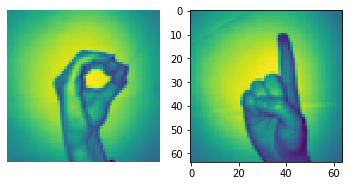

In [21]:
import numpy as np

x_1 = np.load('data/X.npy')
y_1 = np.load('data/Y.npy')
img_size = 64 # our pixel size.

plt.subplot(1,2,1)   # subplot : sign zero
plt.imshow(x_1[205]) # show image at specified index number
plt.axis('off')      # don't show the axis of sign zero
plt.subplot(1,2,2)   # subplot : sign one
plt.imshow(x_1[822]) # I didn't remove the axis since we can see sizes of our image.

Now it's time to implement slicing to 'y_1' to seperate sign zero & sign one.

In [23]:
x = np.concatenate((x_1[204:409], x_1[822:1027]), axis=0) # concatenate two array along axis 0 (horizontally)

# Now we create an appropriate array for outputs consisting zeros & ones.
z = np.zeros(205)
o = np.ones(205)
y = np.concatenate((z,o), axis=0).reshape(x.shape[0], 1) # concatenate 'z' & 'o' and make it a 2D array
                                                         # (first it was a 1D array with shape (410, ) )

# let's see the shapes of input and output
print('x shape: {}'.format(x.shape))
print('y shape: {}'.format(y.shape))

x shape: (410, 64, 64)
y shape: (410, 1)


1. Let's split our x & y for training and testing. I choose %90 for training data and rest for testing data.
2. So our test_size = 0.9
3. random_state can be anything but the 'None'. Each number that random_state equals determines a specific 'seed' in data, so everytime we run the same train & test data reserved by user.

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)
print(x_train.shape)

(369, 64, 64)


In [34]:
x_test.shape[0]

41

We have 3D arrays of x_train & x_test. So in order to be able to use it in our model, we need to turn them into 2D arrays.

In [35]:
x_train_new = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test_new = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

print('x_train new : {}\nx_test_new : {}'.format(x_train_new.shape, x_test_new.shape))

x_train new : (369, 4096)
x_test_new : (41, 4096)


In [36]:
x_train = x_train_new.T
x_test = x_test_new.T
y_train = y_train.T
y_test = y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 369)
x test:  (4096, 41)
y train:  (1, 369)
y test:  (1, 41)


### LOGISTIC REGRESSION

1. It's a binary classification algorithm in which there are just 2 different outputs we can label them as 0 and 1. That's why in this kernel we'll only use 2 different signs that are sign zero and sign one.
2. Logistic regression can be considered as the simplest neural network.
3. Our parameters are "w" and "b" standing for "Weights" and "Bias"
4. Our main function at first step is : <code>z = w.T * x + b</code>
5. T stands for transpose of matrix 'w' which is in shape (4096, 1) here. Which means there are weights corresponding to every pixel or sample of an image/class.
6. Then, we need to put our function "z" into the sigmoid fucntion to calculate its probability of result being 0 or 1 with respect to the threshold we'll determine.

<code>y_head = sigmoid(z) = 1 / ( 1 + e^(-z) )</code>

#### Initializing Parameters "w" & "b"

Let the first values of parameters be 0.01 and 0 respectively. And the dimensions of parameters have to be qualified for dot product with matrix "x". As it's been told before, count of weights have to be the same as pixels (4096).

In [37]:
def initialize_params(dimension):
    w = np.full((dimension, 1), 0.01) # first value of weights are 0.01
    b = 0                             # first value of bias is zero
    return w, b                       # return the necessary values that'll be used later in order to finish functions everytime

def sigmoid(z):
    y_head = 1/ (1+ np.exp(-z))
    return y_head

1. Our main purpose in logistic regression to set the parameters w and b to reduce the cost function.
2. Cost function is the sum of losses for every image.
3. So to reduce the losses, so cost, we need to update our parameters by using Gradient Descent Method.
4. For every values of parameters w and b, there is a corresponding cost values on the curve.
5. After forward propagation which is until we lost cost function as seen in the code below, we take gradients of weights and bias, and update them with the formulas;

Learning rate is an hyperparameters tuned by us, different values must be tried to find the minimum parameters, so it's always good to start with a small learning rate. But if it's too small, it'll affect the speed of a model; vice versa the minimum can be missed and never be reached again. b = b - learning_rate(gradient of b) w = w - learning_rate(gradient of w) By the way these formulas are coming from the derivative of cost function with respect to 'w' & 'b'. You can check it if you want to confirm.

Watch this video:
    https://www.youtube.com/watch?v=Ilg3gGewQ5U&t=2s

In [ ]:
# Forward & Backward Propagation
def forward_backward_propagation(w, b, x_train, y_train):
    # Forward Propagation
    z = np.dot(w.T, x_train) + b                                     # z function consisting parameters w, b 
    y_head = sigmoid(z)                                              # get the probability through sigmoid fucntion
    loss = -(1 - y_train)*np.log(1 - y_head) - y_train*np.log(y_head)# the formula of loss function
    cost = (np.sum(loss)) / (x_train.shape[1])                       # cost function : sum of the loss function of every image
    
    # Backward Propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # derivative of cost function with respect to 'w'
    derivative_bias = np.sum(y_head-y_train) / x_train.shape[1]                 # derivative of cost function with respect to 'b'
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias} # creating a dictionary to store w & b values
    
    return cost,gradients   # return cost and gradients which will be used later

In [ ]:
# Updating Parameters
def update(w, b, x_train, y_train, learning_rate, number_of_iterarion):

    costs = [] # that'll be used for visualizate cost with respect to iteration count
    index = [] # same here as one row above

    for i in range(number_of_iterarion):    # do it as iteration count
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)  # return updated cost and gradients every iteration by calling function.
     
        w = w - learning_rate * gradients["derivative_weight"]              # update weights
        b = b - learning_rate * gradients["derivative_bias"]                # update bias
        if i%10 == 0:                                            # in every ten iterations
            costs.append(cost)                                   # store cost in list(costs)
            index.append(i)                                      # store iteration number in the list : index
            print ("cost at iteration {} : {}".format(i, cost))
    
    parameters = {"w": w,"b": b}  # most optimized weights & bias is stored in 'parameters' dictionary
    plt.plot(index,costs)         # plotting index vs costs
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters # return parameters which will be used later

In [ ]:
# Predicting with Test Data
def predict(w,b,x_test):
    z = sigmoid(np.dot(w.T, x_test) + b)   # new "y_head" function full of probabilistic values of x_test data
    y_pred = np.zeros((1,x_test.shape[1])) # form a matrix full of zeros so as to change later
    for i in range(x_test.shape[1]):       # for every values of "y_head"
        if z[0,i] <= 0.5:                  # if y_head <= 0.5 which is our threshold,
            y_pred[0,i] = 0                # then predict it as sign zero.
        else:
            y_pred[0,i] = 1                # else if it's greater than 0.5, then let it be sign one.

    return y_pred                          # return the matrix of predicted values y_pred

In [ ]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, iterations):
    
    dimension =  x_train.shape[0]      # set the dimension on the same value as images
    w,b = initialize_params(dimension) # return w & b

    parameters = update(w, b, x_train, y_train, learning_rate, iterations)  # forward & backward propagation : return brand new updated params
    
    y_pred_test  = predict(parameters["w"],parameters["b"], x_test)  # overfit check if it occured an overfitting situation, then the accuracy of-
    y_pred_train = predict(parameters["w"],parameters["b"], x_train) # test values would be significantly low as opposed to accuracy of train values.      

    print("train accuracy: {}".format(100 - np.mean(np.abs(y_pred_train - y_train)) * 100)) # train accuracy
    print("test accuracy:  {}".format(100 - np.mean(np.abs(y_pred_test - y_test)) * 100))   # test acuracy - no overfitting or underfitting
    
logistic_regression(x_train, y_train, x_test, y_test, learning_rate = 0.02, iterations = 200) # perform logistic regression classification

### LOGISTIC REGRESSION WITH SCIKIT-LEARN

Altough the logistic regression has the similar mentality with deep learning, it's a machine learning classification algorithm. So there is a library we can import and tune our parameters for best accuracy after Grid Search.

In [ ]:
# Grid Search

from sklearn.model_selection import GridSearchCV    # import Grid Search Cross Validation to find optimujm parameters
from sklearn.linear_model import LogisticRegression # import Logistic Regression
lr = LogisticRegression()  

parameters = {'C':np.logspace(-5,5,11), 'penalty':['l1', 'l2']} # create a dictionary  within Logistic Regression parameters inside
lr_cv = GridSearchCV(lr, parameters, cv = 10)                   # method, parameters of that method, count of Cross Validation.
lr_cv.fit(x_train.T, y_train.T)                                 # fit the model for our values

print('tuned hyperparameters : {}'.format(lr_cv.best_params_))  # Now we'll se best parameters among the "parameters"
print('best score: {}'.format(lr_cv.best_score_))               # Best score of the Logistic Regression with best parameters

In [ ]:
# Logistic Regression

lr2 = LogisticRegression(C=1.0, penalty = 'l2') # Use the parameters within Logistic Regression
lr2.fit(x_train.T, y_train.T)                   # fit the model for our train values

print('score for test values: {}'.format(lr2.score(x_test.T, y_test.T))) # test score